In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Exploratory Data Analysis

**1. Target variable**

<AxesSubplot:xlabel='Response', ylabel='count'>

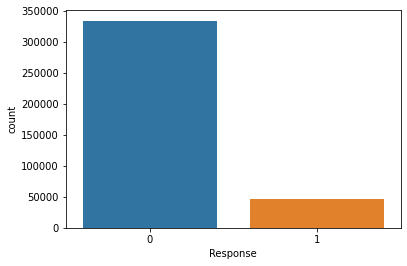

In [5]:
sns.countplot(data=df_train,x='Response')

**2. Gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

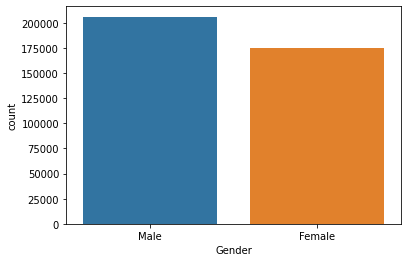

In [6]:
sns.countplot(data=df_train,x='Gender')

<AxesSubplot:xlabel='Response', ylabel='count'>

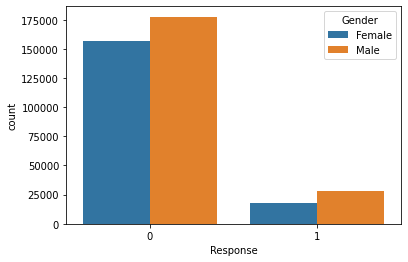

In [7]:
df_res_gen = df_train.groupby(['Response','Gender']).size().reset_index(name='count')
sns.barplot(data=df_res_gen,x='Response',y='count',hue='Gender')

**3. Age**

<AxesSubplot:xlabel='Age'>

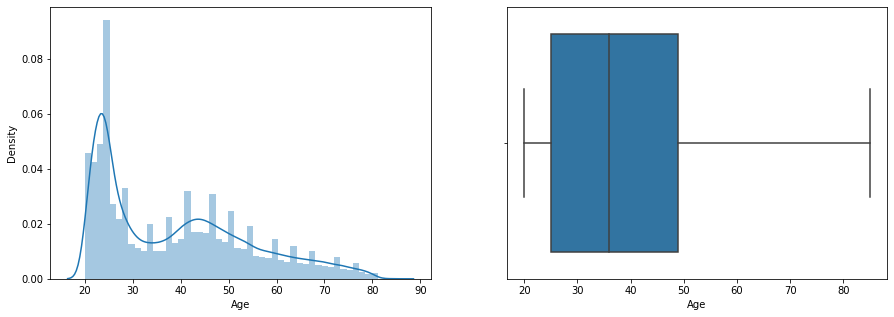

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train.Age)
plt.subplot(1,2,2)
sns.boxplot(df_train.Age)

**4. Drive License**

<AxesSubplot:xlabel='Response', ylabel='count'>

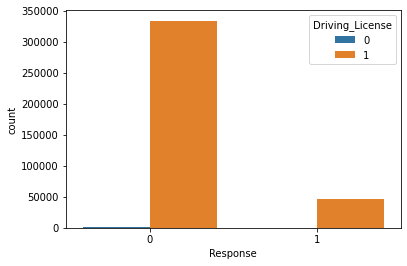

In [9]:
df_res_lic = df_train.groupby(['Response','Driving_License']).size().reset_index(name='count')
sns.barplot(data=df_res_lic,x='Response',y='count',hue='Driving_License')

**5. Previously_Insured**

<AxesSubplot:xlabel='Response', ylabel='count'>

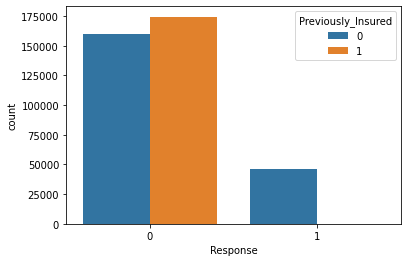

In [10]:
df_res_lic = df_train.groupby(['Response','Previously_Insured']).size().reset_index(name='count')
sns.barplot(data=df_res_lic,x='Response',y='count',hue='Previously_Insured')

**6. Vehicle_Age**

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

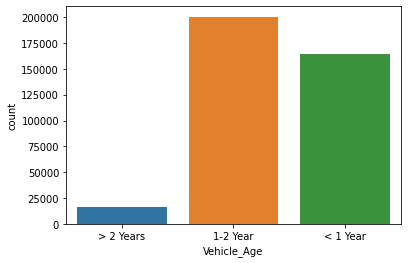

In [11]:
sns.countplot(data=df_train,x='Vehicle_Age')

<AxesSubplot:xlabel='Response', ylabel='count'>

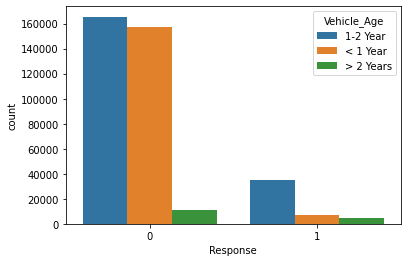

In [12]:
df_res_lic = df_train.groupby(['Response','Vehicle_Age']).size().reset_index(name='count')
sns.barplot(data=df_res_lic,x='Response',y='count',hue='Vehicle_Age')

**7. Vehicle_Damage**

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

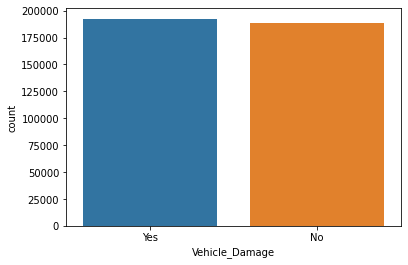

In [13]:
sns.countplot(data=df_train,x='Vehicle_Damage')

<AxesSubplot:xlabel='Response', ylabel='count'>

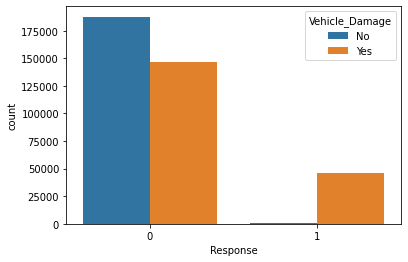

In [14]:
df_res_lic = df_train.groupby(['Response','Vehicle_Damage']).size().reset_index(name='count')
sns.barplot(data=df_res_lic,x='Response',y='count',hue='Vehicle_Damage')

**8. Annual_Premium**

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

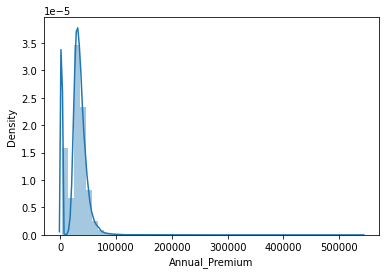

In [15]:
sns.distplot(df_train['Annual_Premium'])

**9. Vintage**

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

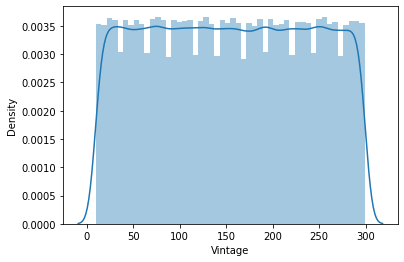

In [16]:
sns.distplot(df_train['Vintage'])

# Data Preprocessing

In [17]:
df_train['Gender'] = df_train['Gender'].map({'Male':1,'Female':0})
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes':1,'No':0})

In [18]:
df_train1 = pd.get_dummies(df_train,columns=['Vehicle_Age'],drop_first=True)
df_train1['Vehicle_Age_< 1 Year'] = df_train1['Vehicle_Age_< 1 Year'].astype(int)
df_train1['Vehicle_Age_> 2 Years'] = df_train1['Vehicle_Age_> 2 Years'].astype(int)
df_train1.drop('id',axis=1,inplace=True)
df_train1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


# Seperate Data

In [19]:
X = df_train1.drop('Response',axis=1)
y = df_train1['Response']

In [20]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.338462,1.0,0.349020,0.0,1.0,0.000000,0.759259,0.297578,0.0,0.0
1,0.0,0.384615,1.0,0.884615,1.0,1.0,0.053418,0.179012,0.159170,0.0,0.0
2,0.0,0.338462,1.0,0.538462,0.0,1.0,0.098457,0.154321,0.401384,0.0,0.0
3,0.0,0.338462,1.0,0.236727,0.0,1.0,0.065187,0.842806,0.927336,0.0,0.0
4,1.0,0.461538,1.0,0.653846,1.0,0.0,0.050759,0.759259,0.633218,0.0,0.0


# Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report

Model is: LogisticRegression()
Predictions are : [1 1 0 ... 0 1 0]
Confusion matrix : 
 [[48929 17846]
 [ 7070 59915]]
Outcome values : 
 48929 17846 7070 59915
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.89      0.83     66985
           0       0.87      0.73      0.80     66775

    accuracy                           0.81    133760
   macro avg       0.82      0.81      0.81    133760
weighted avg       0.82      0.81      0.81    133760

Accuracy : 81.4 %
Precision : 87.4 %
Recall : 73.3 %
F1 Score : 0.797
Specificity or True Negative Rate : 89.4 %
Balanced Accuracy : 81.4 %
roc_auc_score: 0.814


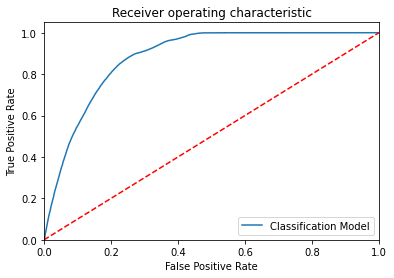

Model is: DecisionTreeClassifier()
Predictions are : [1 1 0 ... 0 0 0]
Confusion matrix : 
 [[58080  8695]
 [ 7528 59457]]
Outcome values : 
 58080 8695 7528 59457
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.89      0.88     66985
           0       0.89      0.87      0.88     66775

    accuracy                           0.88    133760
   macro avg       0.88      0.88      0.88    133760
weighted avg       0.88      0.88      0.88    133760

Accuracy : 87.9 %
Precision : 88.5 %
Recall : 87.0 %
F1 Score : 0.877
Specificity or True Negative Rate : 88.8 %
Balanced Accuracy : 87.9 %
roc_auc_score: 0.879


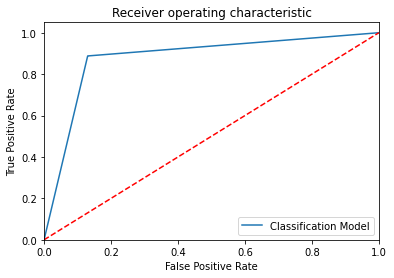

Model is: RandomForestClassifier()
Predictions are : [1 1 0 ... 0 1 0]
Confusion matrix : 
 [[57547  9228]
 [ 6113 60872]]
Outcome values : 
 57547 9228 6113 60872
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.91      0.89     66985
           0       0.90      0.86      0.88     66775

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760

Accuracy : 88.5 %
Precision : 90.4 %
Recall : 86.2 %
F1 Score : 0.882
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 88.6 %
roc_auc_score: 0.885


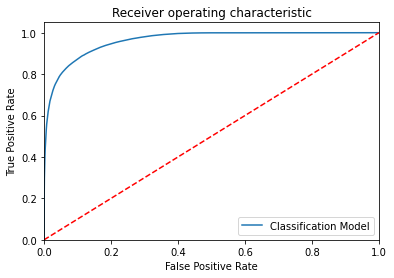

In [24]:
res = pd.DataFrame()

lr = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

Models = [lr,tree,rf]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    

    matrix = confusion_matrix(y_test,prediction)
    print('Confusion matrix : \n', matrix)
    
 
    tp, fn, fp, tn = confusion_matrix(y_test,prediction).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    
    C_Report = classification_report(y_test,prediction,labels=[1,0])
    print('Classification report : \n', C_Report)

   
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    
    # ROC Curve
    print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))
    
    logit_roc_auc = roc_auc_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('='*80)
    
    model_dict = {'Model Name' : model, 
                  'True Positive' : tp, 
                  'False Negative' : fn, 
                  'False Positive' : fp,
                  'True Negative' : tn,
                  'Accuracy' : accuracy,
                  'Precision' : precision,
                  'Recall' : sensitivity,
                  'F1 Score' : f1Score,
                  'Specificity' : specificity,
                  'ROC_AUC_Score':roc_auc_score(y_test, prediction),
                  'Balanced Accuracy':balanced_accuracy}   
    res = res.append(model_dict,ignore_index=True)

In [25]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']}
out=pd.DataFrame(models)
out['Accuracy']=res['Accuracy']
out['Precision']=res['Precision']
out['Recall']=res['Recall']
out['F1 Score']=res['F1 Score']
out['True Positive']=res['True Positive']
out['False Negative']=res['False Negative']
out['False Positive']=res['False Positive']
out['True Negative']=res['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,RandomForestClassifier,0.885,0.904,0.862,0.882,57547.0,9228.0,6113.0,60872.0
1,DecisionTreeClassifier,0.879,0.885,0.870,0.877,58080.0,8695.0,7528.0,59457.0
2,LogisticRegression,0.814,0.874,0.733,0.797,48929.0,17846.0,7070.0,59915.0


In [26]:
y_pred=rf.predict(X_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df_train1.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'Yes',inplace=True)
out['actual'].replace(0,'No',inplace=True)
out['predicted'].replace(1,'Yes',inplace=True)
out['predicted'].replace(0,'No',inplace=True)
out.sample(20)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,actual,predicted
110367,0,22,1,7.0,1,0,2630.0,152.0,200,0,1,0,No,No
128962,0,25,1,27.0,0,1,27291.0,151.0,77,0,1,0,No,No
111533,1,59,1,28.0,0,1,39882.0,124.0,113,1,0,0,Yes,No
347875,0,28,1,42.0,1,0,2630.0,160.0,296,0,1,0,No,No
203974,0,23,1,15.0,0,1,40043.0,152.0,84,0,1,0,No,No
3275,1,47,1,30.0,0,1,25211.0,124.0,213,0,0,0,No,Yes
95252,1,49,1,52.0,0,1,37907.0,26.0,150,1,0,1,Yes,No
183624,0,25,1,28.0,1,0,36059.0,124.0,145,0,1,0,No,No
195228,1,42,1,33.0,0,1,27200.0,124.0,14,0,0,0,No,No
166632,1,44,1,28.0,0,1,31106.0,60.0,63,0,0,0,No,No


In [27]:
temp=pd.DataFrame([[1,42,1,15.0,1,30396,124,27,0,0,0]])
rf.predict(temp)

array([0], dtype=int64)

In [28]:
(np.array(np.array(X_test[0]).reshape(1,-1)))

array([[0., 0., 1., ..., 0., 0., 1.]])

In [29]:
import pickle

In [30]:
pickle.dump(rf,open("model.pkl","wb"))

In [58]:
mod=pickle.load(open("model.pkl","rb"))

In [59]:
mod

RandomForestClassifier()

In [31]:
rf.predict((np.array(np.array(X_test[0]).reshape(1,-1))))

ValueError: X has 133760 features, but DecisionTreeClassifier is expecting 11 features as input.